In [2]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
titanic_data = pd.read_csv('train.csv')

In [4]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)

In [12]:
Y = titanic_data.Survived

In [14]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [16]:
X = pd.get_dummies(X)

In [18]:
X = X.fillna({'Age': X.Age.median()})

In [20]:
clf.fit(X, Y)

DecisionTreeClassifier(criterion='entropy')

In [22]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [26]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy')

In [28]:
clf.score(X_train, Y_train)

0.9798657718120806

In [30]:
clf.score(X_test, Y_test)

0.7661016949152543

In [32]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [34]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [36]:
clf.score(X_train, Y_train)

0.8238255033557047

In [38]:
clf.score(X_test, Y_test)

0.8203389830508474

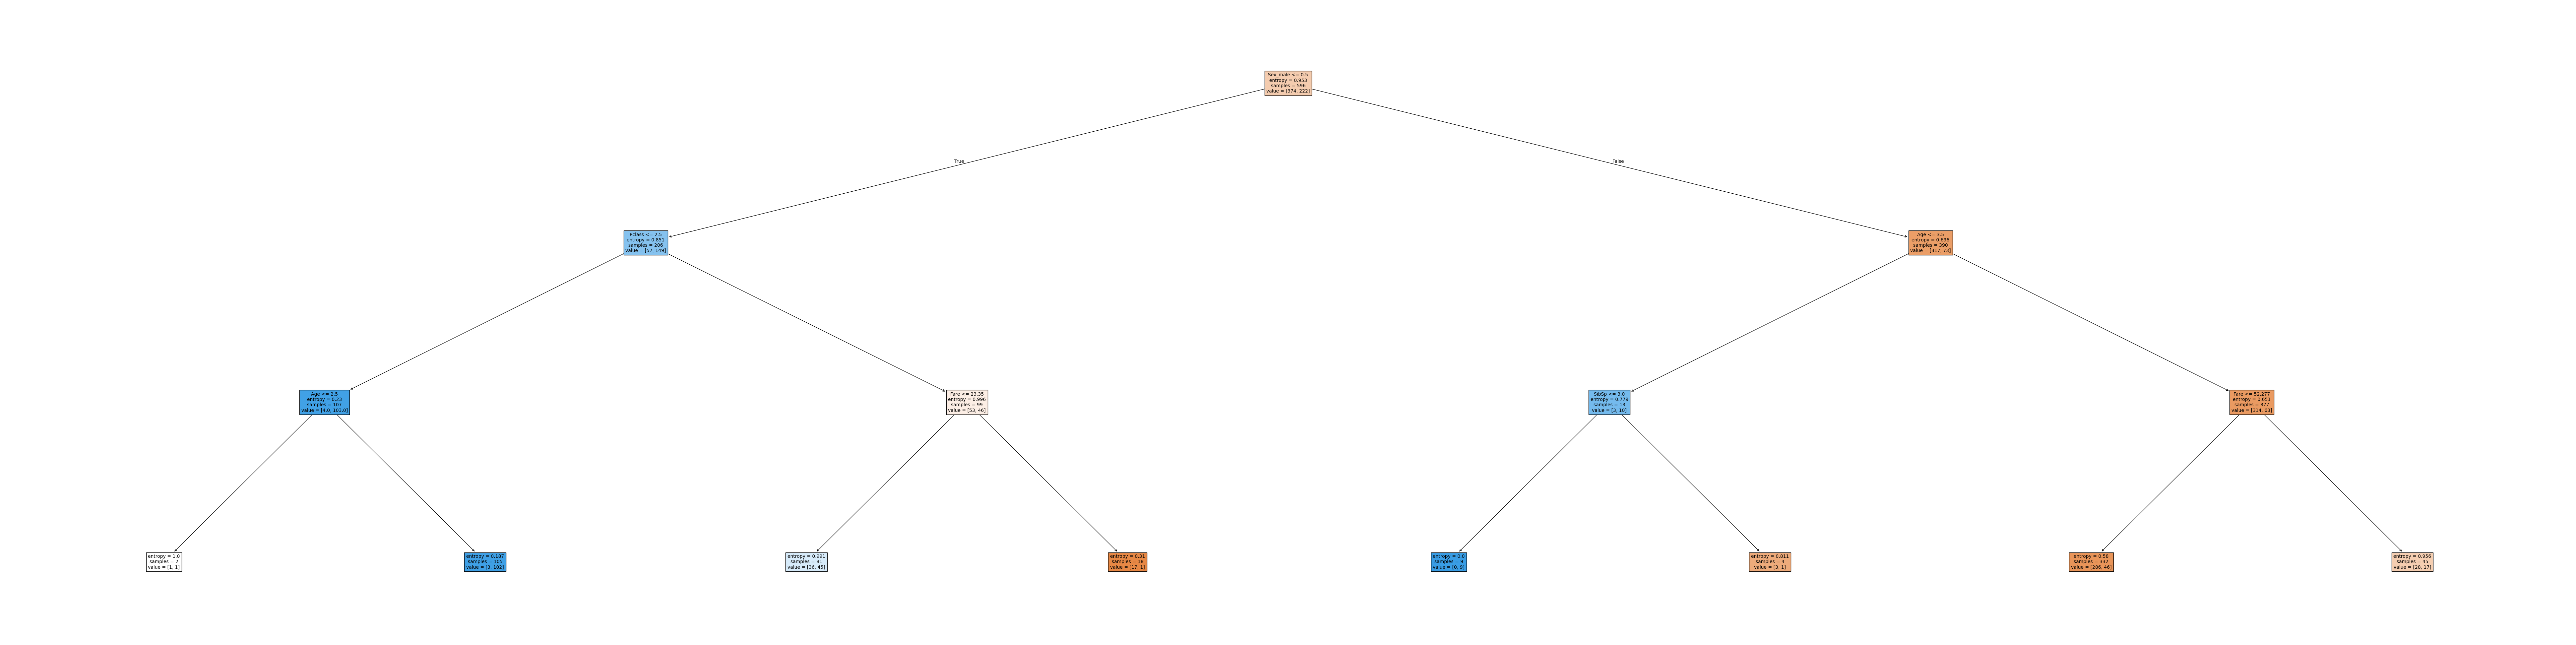

In [40]:
plt.figure(figsize=(100, 25))
tree.plot_tree(clf, fontsize=10, feature_names=list(X), filled=True)
plt.show()

In [42]:
max_depth_values = range(1, 100)

In [44]:
scores_data = pd.DataFrame()

In [46]:
from sklearn.model_selection import cross_val_score

In [48]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, Y_train)
    train_score = clf.score(X_train, Y_train)
    test_score = clf.score(X_test, Y_test)

    mean_cross_val_score = cross_val_score(clf, X_train, Y_train, cv=5).mean()

    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]
                                   })
    scores_data = pd.concat([scores_data, temp_score_data])

In [49]:
scores_data

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.806780,0.802073
...,...,...,...,...
0,95,0.979866,0.776271,0.765126
0,96,0.979866,0.759322,0.780252
0,97,0.979866,0.769492,0.763459
0,98,0.979866,0.769492,0.771863


In [50]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'],
                           value_vars=['train_score', 'test_score', 'cross_val_score'],
                           var_name='set_type',
                           value_name='score')

In [51]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


In [52]:
scores_data_long.query("set_type == 'cross_val_score'").head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.802073
203,6,cross_val_score,0.798711
204,7,cross_val_score,0.798697
205,8,cross_val_score,0.800364
206,9,cross_val_score,0.800350
207,10,cross_val_score,0.800350


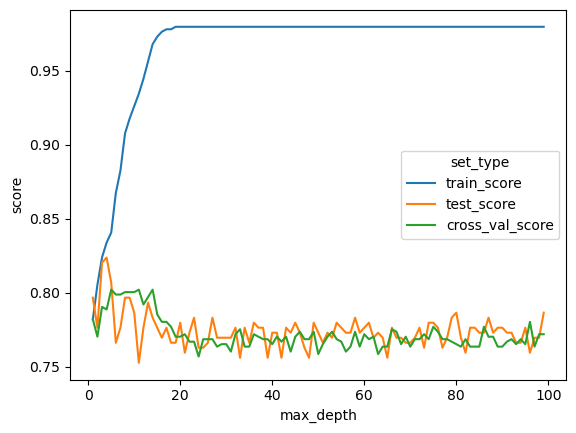

In [58]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)
plt.show()

In [60]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [62]:
from sklearn.model_selection import cross_validate

In [64]:
cross_validate(clf, X_train, Y_train, cv=5)

{'fit_time': array([0.00466394, 0.00345111, 0.00259995, 0.00278902, 0.00284386]),
 'score_time': array([0.00295997, 0.0017879 , 0.0018611 , 0.00180602, 0.00185013]),
 'test_score': array([0.76666667, 0.82352941, 0.78991597, 0.75630252, 0.80672269])}

In [66]:
cross_validate(clf, X_train, Y_train, cv=5)['test_score']

array([0.76666667, 0.82352941, 0.78991597, 0.75630252, 0.80672269])

In [68]:
cross_validate(clf, X_train, Y_train, cv=5)['test_score'].mean()

0.7886274509803922

In [70]:
from sklearn.model_selection import cross_val_score

In [72]:
cross_val_score(clf, X_train, Y_train, cv=5)

array([0.76666667, 0.82352941, 0.78991597, 0.75630252, 0.80672269])

In [74]:
cross_val_score(clf, X_train, Y_train, cv=5).mean()

0.7886274509803922

In [76]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [78]:
cross_val_score(clf, X_test, Y_test, cv=5).mean()

0.7694915254237288

In [80]:
from sklearn.model_selection import GridSearchCV

In [82]:
clf_roc = tree.DecisionTreeClassifier()

In [84]:
parametrs = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 30)}

In [86]:
grid_search_cv_clf = GridSearchCV(clf_roc, parametrs, cv=5)

In [88]:

grid_search_cv_clf.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [90]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 9}

In [92]:
best_clf = grid_search_cv_clf.best_estimator_

In [94]:
best_clf.score(X_test, Y_test)

0.8

In [96]:
from sklearn.metrics import precision_score, recall_score

In [98]:
y_pred = best_clf.predict(X_test)

In [100]:
precision_score(Y_test, y_pred)

0.8279569892473119

In [102]:
recall_score(Y_test, y_pred)

0.6416666666666667

In [104]:
y_predicted_prob = best_clf.predict_proba(X_test)

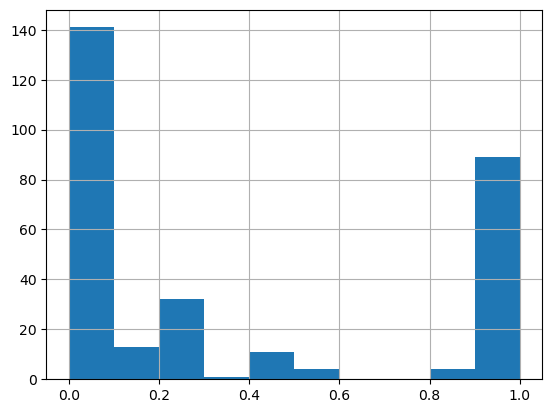

In [106]:
pd.Series(y_predicted_prob[:, 1]).hist()
plt.show()

In [108]:
import numpy as np

In [110]:
y_pred = np.where(y_predicted_prob[:, 1] > 0.8, 1, 0)

In [112]:
precision_score(Y_test, y_pred)

0.8279569892473119

In [114]:
recall_score(Y_test, y_pred)

0.6416666666666667

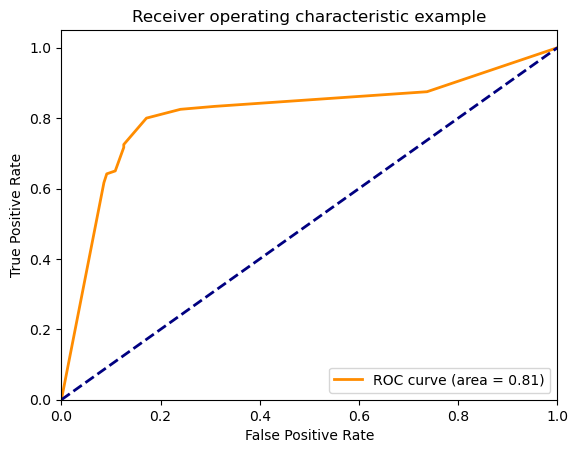

In [116]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(Y_test, y_predicted_prob[:, 1])
roc_auc= auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [144]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=100, min_samples_leaf=10)

In [146]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10,
                       min_samples_split=100)

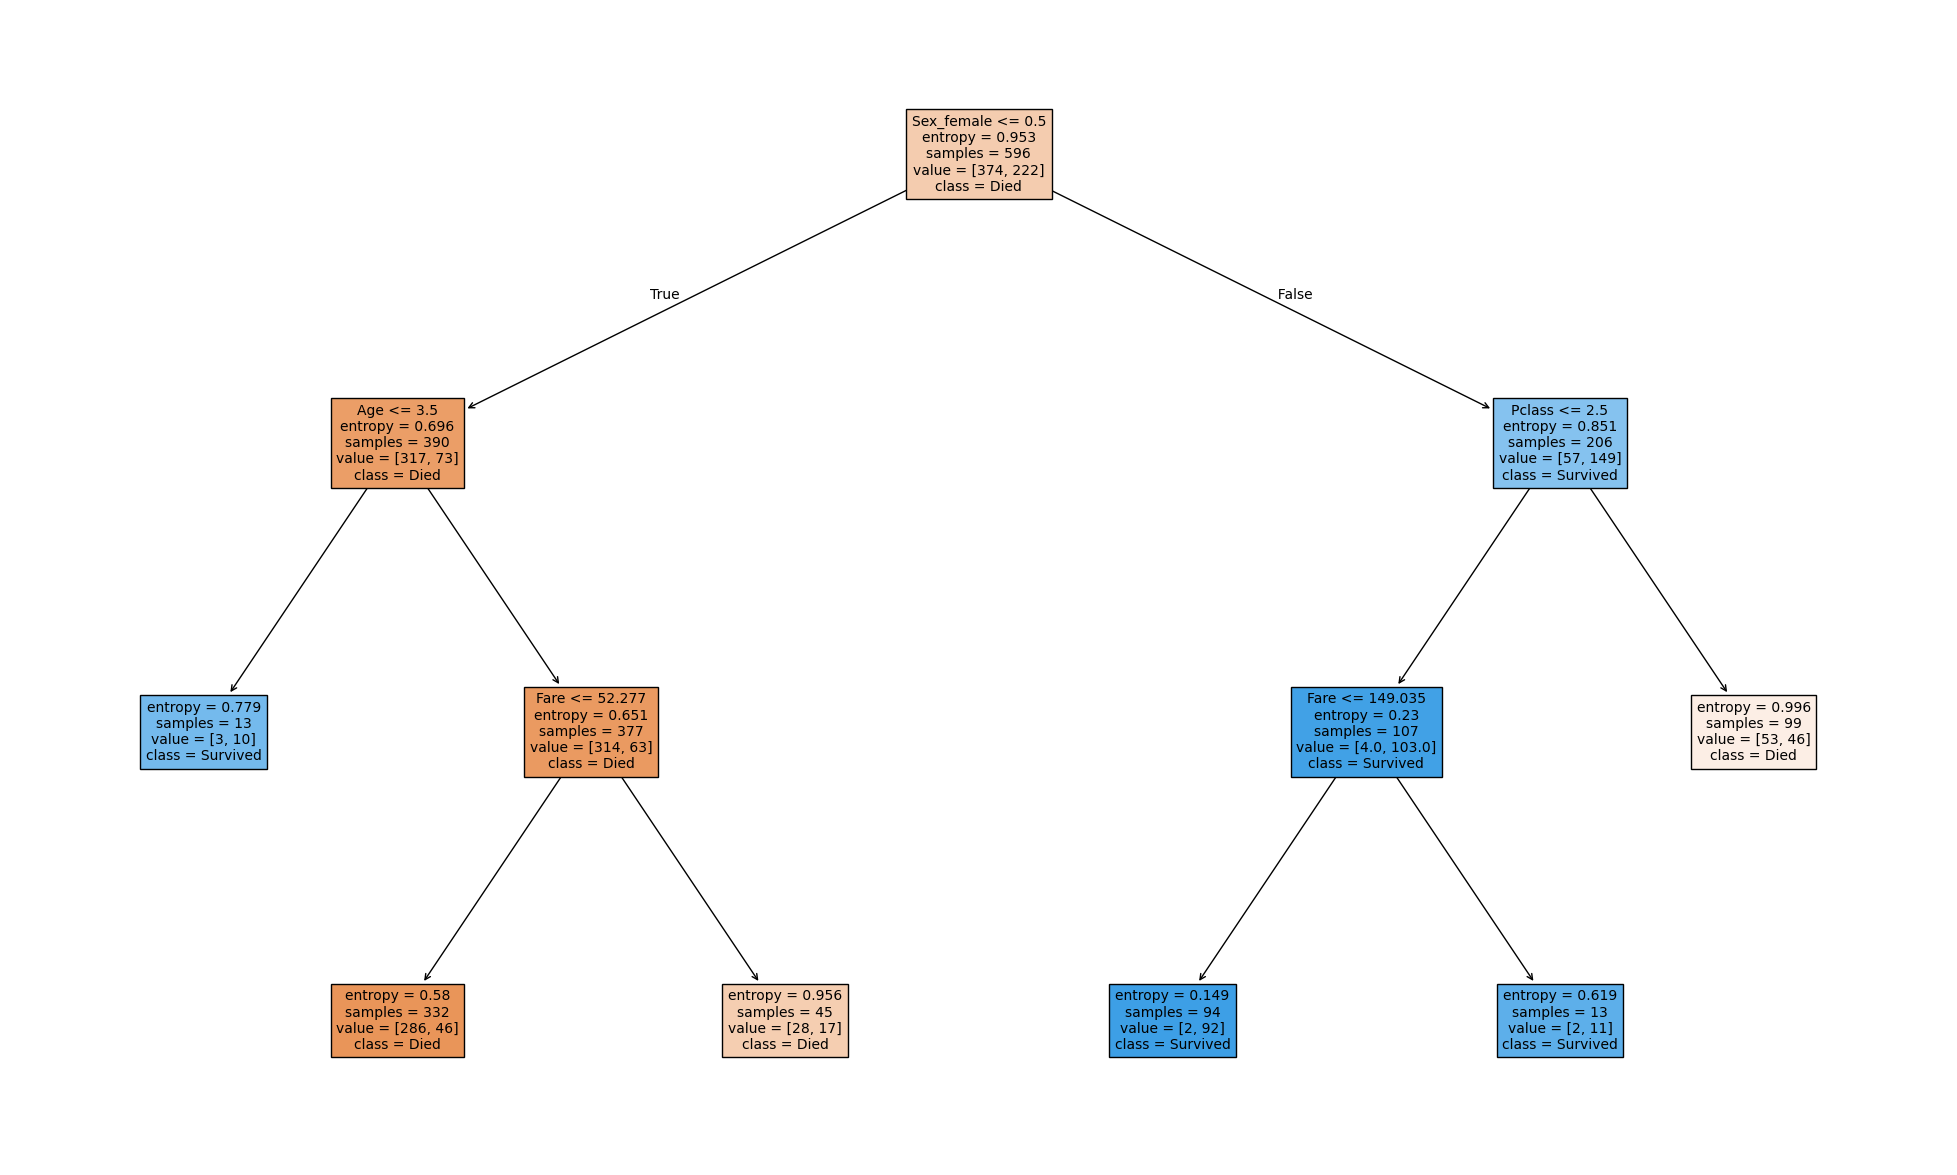

In [148]:
plt.figure(figsize=(25, 15))
tree.plot_tree(clf, fontsize=10, feature_names=list(X), filled=True, class_names = ['Died', 'Survived'])
plt.show()

In [164]:
from sklearn.ensemble import RandomForestClassifier

In [166]:
clf_rf = RandomForestClassifier()

In [168]:
parametrs = {'n_estimators': [10, 20, 30], 'max_depth': [2, 5, 7, 10]}

In [170]:
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv=5)

In [172]:
grid_search_cv_clf.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 7, 10],
                         'n_estimators': [10, 20, 30]})

In [174]:
grid_search_cv_clf.best_params_

{'max_depth': 5, 'n_estimators': 30}

In [188]:
best_clf = grid_search_cv_clf.best_estimator_

In [190]:
best_clf.score(X_test, Y_test)

0.8033898305084746

In [194]:
feature_importances = best_clf.feature_importances_

In [196]:
feature_importances_df = pd.DataFrame({'features': list(X_train), 'feature_importances': feature_importances })

In [200]:
feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
5,Sex_female,0.275525
6,Sex_male,0.243396
4,Fare,0.130135
0,Pclass,0.114627
1,Age,0.100491
2,SibSp,0.041995
3,Parch,0.039170
7,Embarked_C,0.020725
9,Embarked_S,0.019390
8,Embarked_Q,0.014546
